In [2]:
import numpy as np
from numpy import genfromtxt

from open3d import *
import open3d as o3d

import math
import pptk

# Surface measurement

In [3]:
!ls ./generated_data

depths_csv                        normals_csv
images                            pose_estimation_iteration_results
merged_meshes                     vertices_csv
meshes


In [4]:
points = genfromtxt('./generated_data/surface_measurement/vertices_csv/frame_0_level_2.csv', delimiter=';')[:, :3]
normals = genfromtxt('./generated_data/surface_measurement/normals_csv/frame_0_level_2.csv', delimiter=';')[:, :3]

In [5]:
print(points.shape, normals.shape)

(19200, 3) (19200, 3)


In [6]:
points_no_inf = points[(points[:, 0] != -float("inf")) & (normals[:, 0] != -float("inf")), :]
normals_no_inf = normals[(points[:, 0] != -float("inf")) & (normals[:, 0] != -float("inf")), :]

In [7]:
normals_no_inf

array([[ 0.864934, -0.391008, -0.314645],
       [ 0.957245, -0.270891, -0.101494],
       [ 0.94781 , -0.171741, -0.268629],
       ...,
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ]])

In [8]:
points_no_inf

array([[-1.30372 , -0.874156,  2.25519 ],
       [-1.29945 , -0.88293 ,  2.27783 ],
       [-1.29956 , -0.89496 ,  2.30887 ],
       ...,
       [ 0.472476,  0.428947,  0.952208],
       [ 0.480439,  0.42958 ,  0.953613],
       [ 0.488403,  0.430195,  0.954978]])

In [9]:
print(points.shape, normals.shape)

(19200, 3) (19200, 3)


In [11]:
# from mayavi.mlab import points3d, quiver3d, show

# def displayPointsAndNormals(P, N):  
#     x = P[:, 0]                        
#     y = P[:, 1]                        
#     z = P[:, 2]                        
#     points3d(x, y, z, color=(0, 0, 0), scale_factor=0.025)                                                                                                  

#     u = N[:, 0]                        
#     v = N[:, 1]                        
#     w = N[:, 2]                        
#     quiver3d(x, y, z, u, v, w, color=(0.5, 0., 0), opacity=0.75, line_width=0.5, scale_factor=0.1)         
#     show()

In [12]:
# displayPointsAndNormals(points_no_inf[:,:], normals_no_inf[:, :])

In [13]:
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(points_no_inf)

In [14]:
# o3d.visualization.draw_geometries([pcd])

In [15]:
depth_unfiltered = genfromtxt('./generated_data/surface_measurement/depths_csv/frame_0.csv', delimiter=';')
depth_filtered = genfromtxt('./generated_data/surface_measurement/depths_csv/filtered_frame_0.csv', delimiter=';')

In [16]:
depth_filtered_no_inf = depth_filtered[depth_filtered != -float("inf")]
depth_unfiltered_no_inf = depth_unfiltered[depth_unfiltered != -float("inf")]
print(f"Uniltered mean={depth_unfiltered_no_inf.mean()}, std: {depth_unfiltered_no_inf.std()}")
print(f"Filtered mean={depth_filtered_no_inf.mean()}, std: {depth_filtered_no_inf.std()}")

Uniltered mean=1.4271831795541057, std: 0.5988173282525098
Filtered mean=1.4272120511669384, std: 0.5986510461584845


In [17]:
depth_filtered_no_inf.reshape(-1, 5).std(axis=1).mean()

0.009639146025700098

In [18]:
depth_unfiltered_no_inf.reshape(-1, 5).std(axis=1).mean()

0.010290092693471224

In [19]:
depth_filtered_no_inf.reshape(-1, 5).std(axis=1).mean() / depth_unfiltered_no_inf.reshape(-1, 5).std(axis=1).mean() 

0.9367404466449429

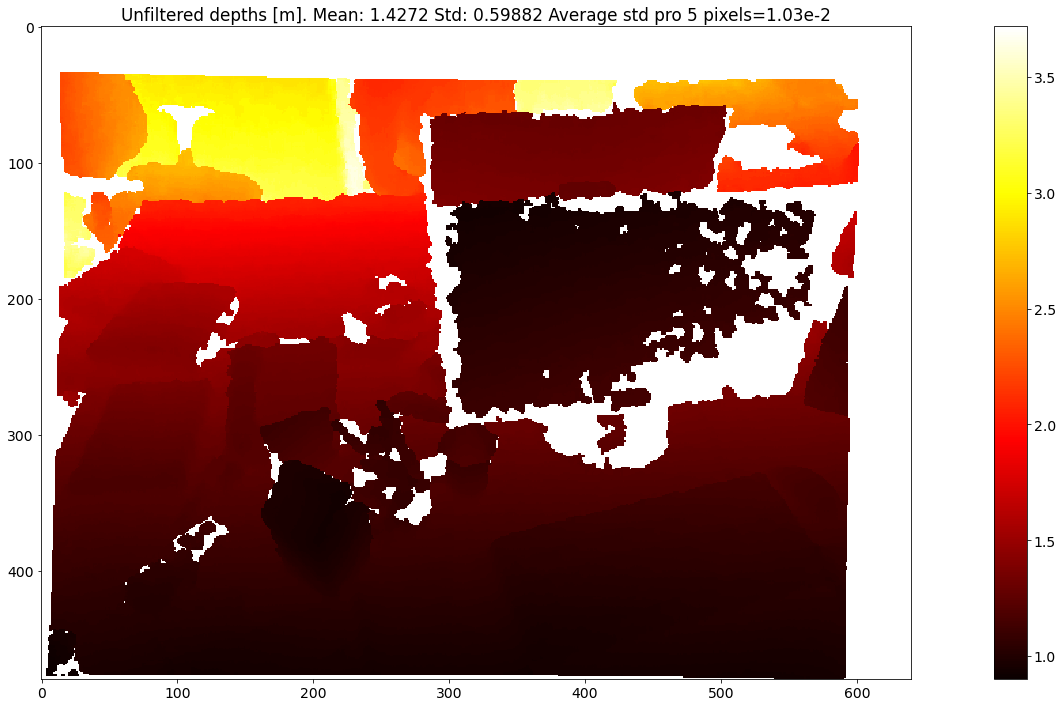

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig = plt.figure(figsize=(30, 12))
matplotlib.rcParams.update({'font.size': 14})
pos = plt.imshow(depth_unfiltered, cmap='hot', interpolation='none')
plt.title(f"Unfiltered depths [m]. Mean: {1.4272} Std: {0.59882} Average std pro 5 pixels={1.03}e-2")
plt.colorbar()
# plt.show()
plt.savefig("./generated_data/images/unfiltered_depth_image.png")

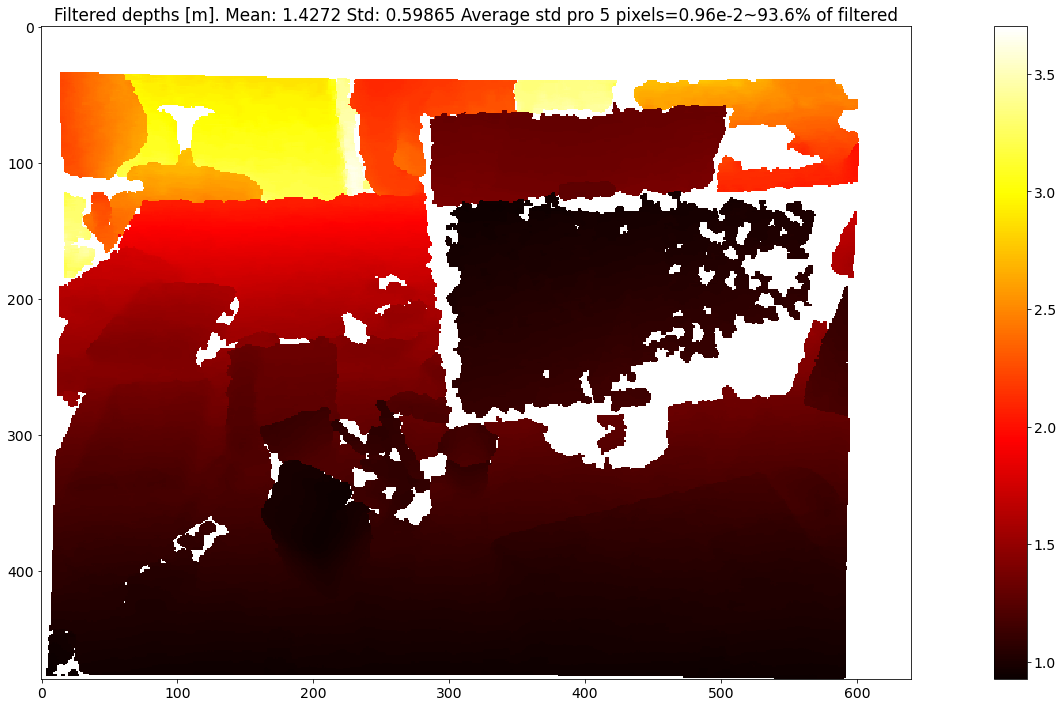

In [43]:
fig = plt.figure(figsize=(30, 12))
matplotlib.rcParams.update({'font.size': 14})
pos = plt.imshow(depth_filtered, cmap='hot', interpolation='none')
plt.title(f"Filtered depths [m]. Mean: {1.4272} Std: {0.59865} Average std pro 5 pixels={0.96}e-2~93.6% of filtered")
plt.colorbar()
# plt.show()
plt.savefig("./generated_data/images/filtered_depth_image.png")

# Pose estimation

In [28]:
valid_correpondances_0_1 = [231, 2532, 2539, 2556, 4586, 4595, 4535, 4528, 4524, 8471, 8670, 8931, 8918, 8867, 8870, 8794, 8792, 8719, 8664]
average_distance_0_1 =  [0.00631273,
 0.00483002,
 0.00328205,
 0.00345694,
 0.00290993,
 0.00279485,
 0.00281784,
 0.00282453,
 0.00282149,
 0.00288234,
 0.00304031,
 0.00331104,
 0.00337495,
 0.00315205,
 0.00317449,
 0.00320209,
 0.00322948,
 0.00322362,
 0.00320633]
average_loss_0_1 = [
     0.00416153,
 0.00296766,
 0.000884882,
 0.000861953,
 0.00132454,
 0.00113664,
 0.00113449,
 0.00113773,
 0.00113643,
 0.00164515,
 0.00183404,
 0.00203264,
 0.00203844,
 0.00197688,
 0.00194082,
 0.00192367,
 0.00191731,
 0.00192099,
 0.00191947
]

In [29]:
valid_correpondances_10_11 = [ 376,
 1772,
 2657,
 2777,
 4636,
 4586,
 4612,
 4616,
 4617,
 8742,
 8783,
 8800,
 8757,
 8730,
 8756,
 8760,
 8760,
 8758,
 8756]
average_distance_10_11 = [
     0.00523975,
 0.00633777,
 0.00354233,
 0.00352912,
 0.00279349,
 0.00276799,
 0.00275937,
 0.00275858,
 0.00275304,
 0.00240703,
 0.00242343,
 0.00239456,
 0.00240055,
 0.00238763,
 0.00238539,
 0.00238528,
 0.0023819,
 0.00238339,
 0.0023835,
]
average_loss_10_11 = [
     0.00374145,
 0.00428005,
 0.00111592,
 0.00109257,
 0.00104262,
 0.00103731,
 0.00103701,
 0.00104098,
 0.00104362,
 0.00128242,
 0.00129664,
 0.00128946,
 0.00129338,
 0.00129262,
 0.00129081,
 0.00128932,
 0.00128728,
 0.00128877,
 0.00128773,
]

In [34]:
valid_correpondances_20_21 = [ 
 474,
 2746,
 3683,
 3674,
 5864,
 5875,
 5871,
 5871,
 5869,
 9348,
 9338,
 9320,
 9308,
 9291,
 9301,
 9299,
 9302,
 9302,
 9299,
]
average_distance_20_21 = [
 0.00749796,
 0.00362569,
 0.00339886,
 0.00325443,
 0.00232281,
 0.00232839,
 0.00232584,
 0.00232479,
 0.00232522,
 0.0022365,
 0.00224649,
 0.00224503,
 0.00224759,
 0.00224466,
 0.00224532,
 0.00224651,
 0.00224529,
 0.00224579,
 0.00224523,
]
average_loss_20_21 = [
 0.00611385,
 0.00175171,
 0.00115109,
 0.000902677,
 0.000963936,
 0.000961037,
 0.000961012,
 0.00096054,
 0.000960852,
 0.00116263,
 0.00116744,
 0.00116484,
 0.0011677,
 0.00116785,
 0.00116733,
 0.00116789,
 0.00116698,
 0.00116696,
 0.00116762,
]

In [30]:
iterations = list(range(0, 19))

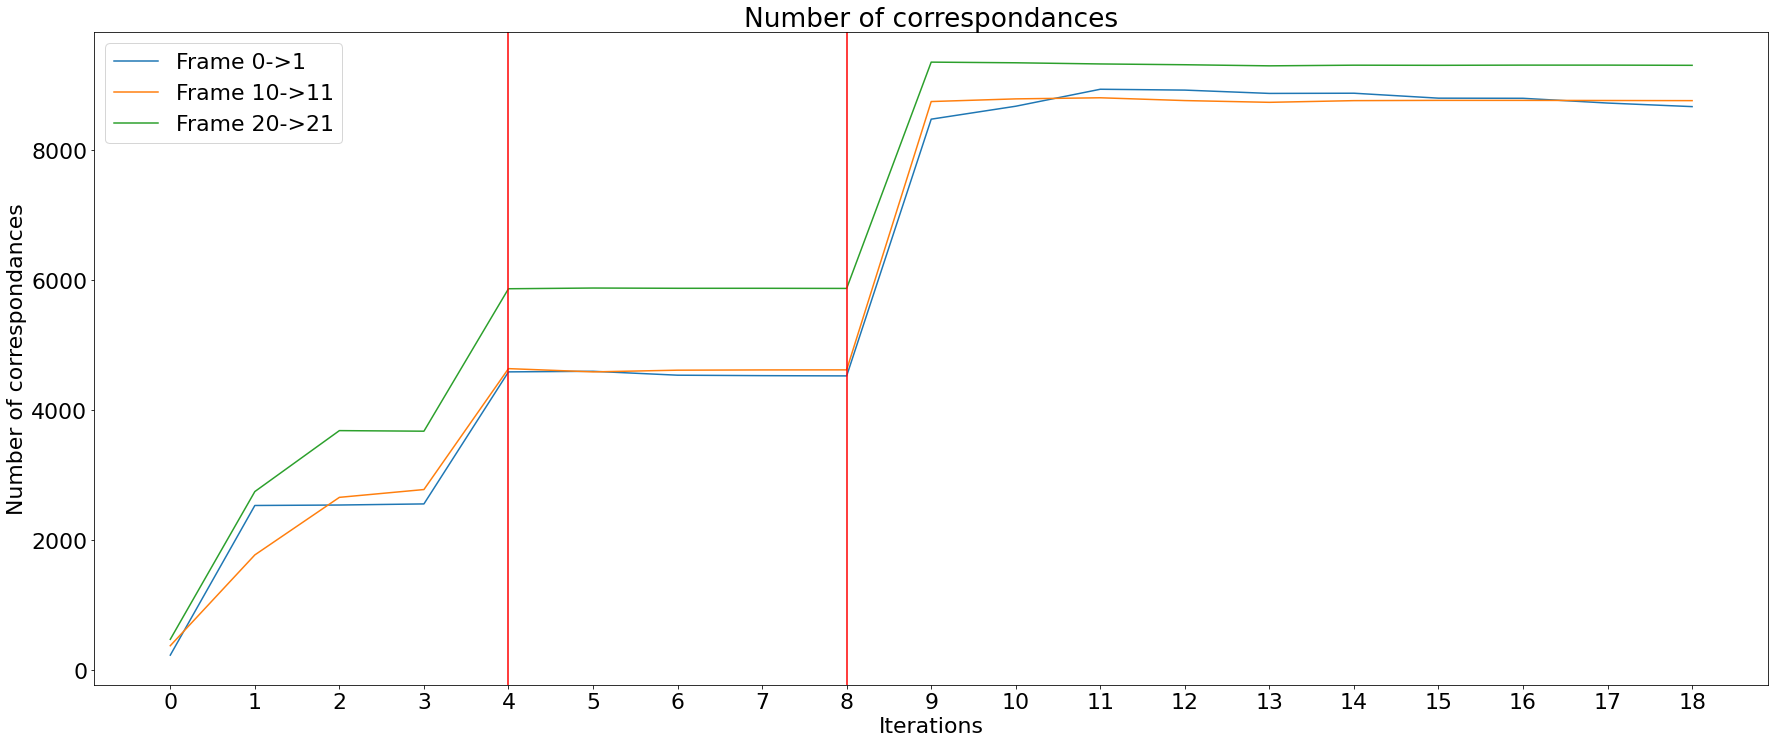

In [35]:
import matplotlib
fig = plt.figure(figsize=(30, 12))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(iterations, valid_correpondances_0_1, label="Frame 0->1")
plt.plot(iterations, valid_correpondances_10_11, label="Frame 10->11")
plt.plot(iterations, valid_correpondances_20_21, label="Frame 20->21")
plt.axvline(x=4, color='r', linestyle='-')
plt.axvline(x=8, color='r', linestyle='-')
plt.legend()
plt.xticks(iterations)
plt.title("Number of correspondances")
plt.ylabel("Number of correspondances")
plt.xlabel("Iterations")
plt.savefig("./generated_data/images/number_of_correspondances.png")

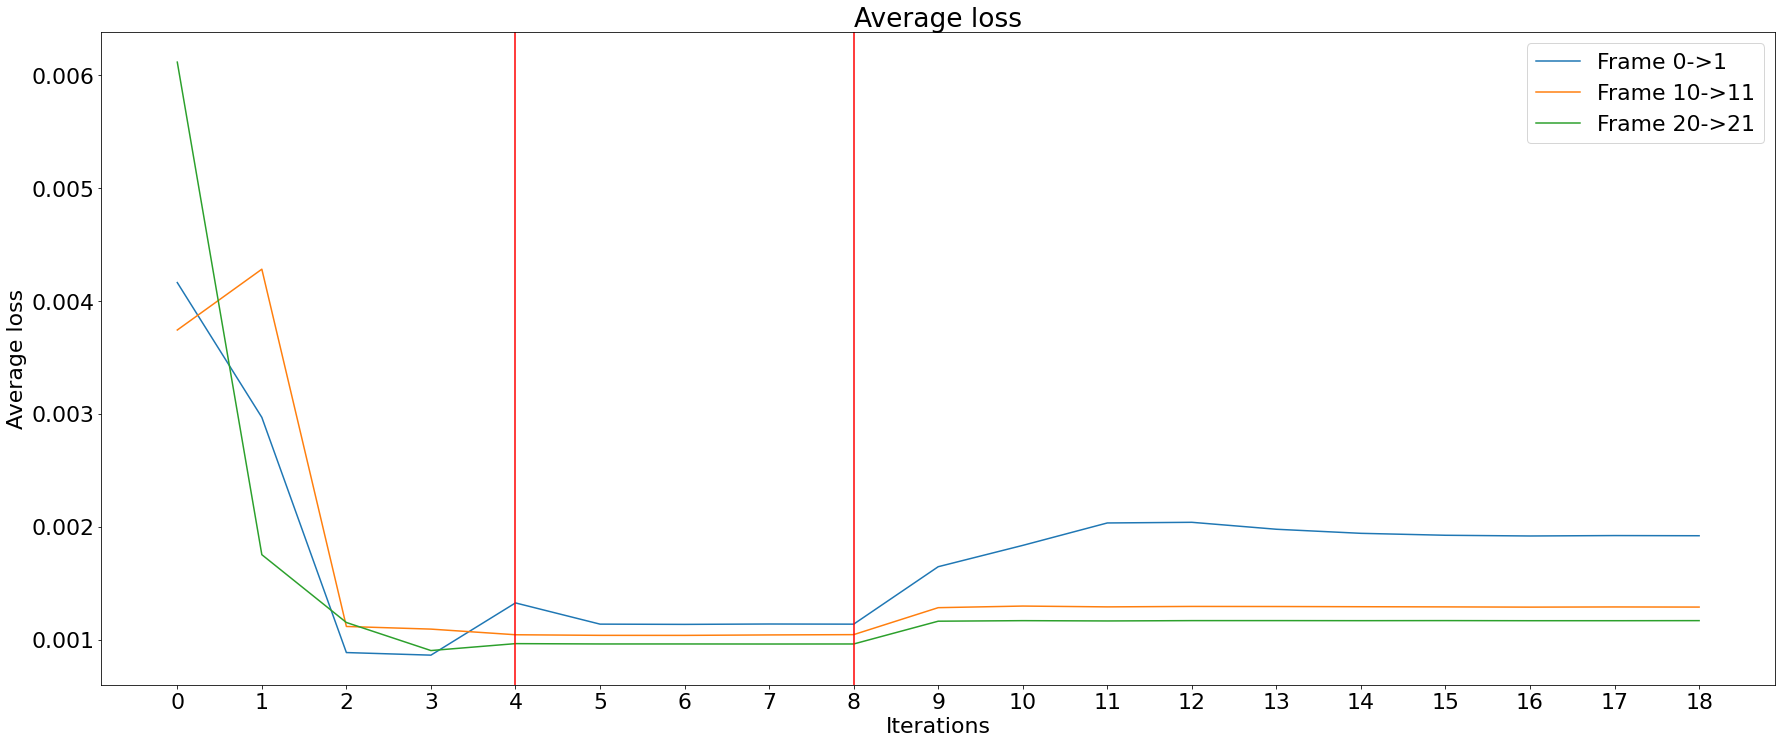

In [36]:
fig = plt.figure(figsize=(30, 12))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(iterations, average_loss_0_1, label="Frame 0->1")
plt.plot(iterations, average_loss_10_11, label="Frame 10->11")
plt.plot(iterations, average_loss_20_21, label="Frame 20->21")
plt.axvline(x=4, color='r', linestyle='-')
plt.axvline(x=8, color='r', linestyle='-')
plt.legend()
plt.xticks(iterations)
plt.title("Average loss")
plt.ylabel("Average loss")
plt.xlabel("Iterations")
plt.savefig("./generated_data/images/average_loss.png")

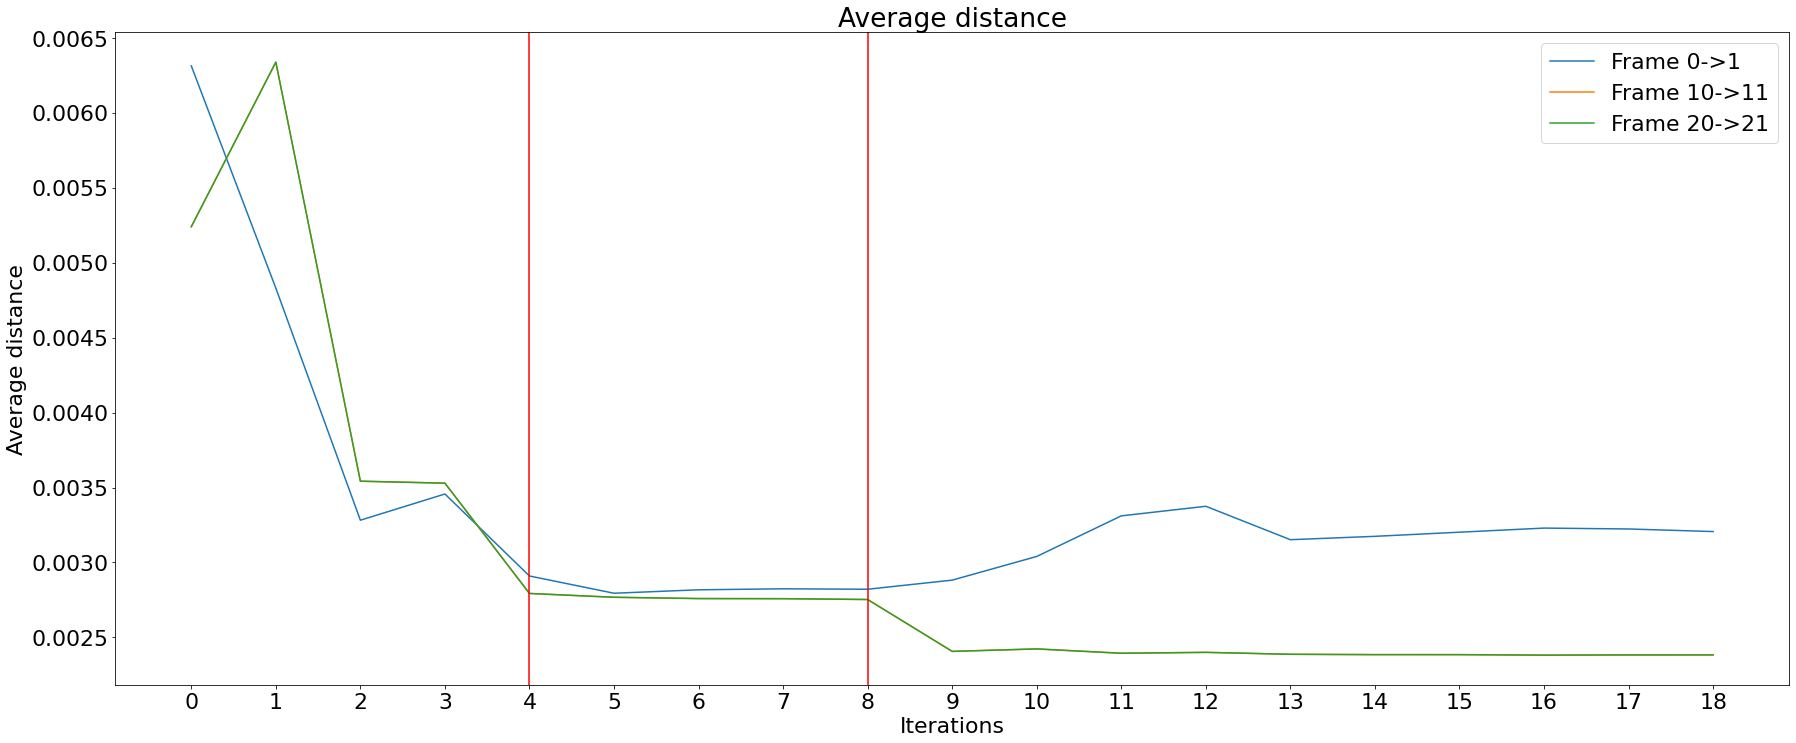

In [41]:
fig = plt.figure(figsize=(30, 12))
matplotlib.rcParams.update({'font.size': 22})
plt.plot(iterations, average_distance_0_1, label="Frame 0->1")
plt.plot(iterations, average_distance_10_11, label="Frame 10->11")
plt.plot(iterations, average_distance_10_11, label="Frame 20->21")
plt.axvline(x=4, color='r', linestyle='-')
plt.axvline(x=8, color='r', linestyle='-')
plt.legend()
plt.xticks(iterations)
plt.title("Average distance")
plt.ylabel("Average distance")
plt.xlabel("Iterations")
plt.savefig("./generated_data/images/average_distance.png")